## Quantitative modelling of TXTL- E.coli and reporter gene 

https://www.nature.com/articles/s41598-019-48468-8#Sec10
https://static-content.springer.com/esm/art%3A10.1038%2Fs41598-019-48468-8/MediaObjects/41598_2019_48468_MOESM1_ESM.pdf

In [1]:
import sympy
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

Model the rate of protein synthesis with assumptions of quasi steady state for 3 MM constants - KM, 70 (mRNA transcription), KM, m (RNA degradation), K M,R (protein translation) and conservation laws for total RNA polymerase (free, bound with sigma 70 factor and transcription on mRNA) and total ribosome concentration (free and performing translation on mRNA)

In [2]:
# biochemical constants that best fit the data (deGFP vs plasmid)
kcat_m = 0.065 # P70 transcription rate 
KM_70 = 1 # MM constant for mRNA transcription
k70 = 0.26 # dissociation constant sigma70 and RNA poly.
S70 = 30 # total concentration of Sigma70 
kd_m = 6.6 # mRNA degradation
KM_m = 8000 # MM constant for RNA degradation
Etot = 400 # total concentration of active RNA poly.
Cm = 10 # rate of transcription (bp/s)
Lm = 800 # length of mRNA 
Kcat_p = 0.006 
KM_R = 10 # MM constant for translation
kmat = 0.000725 # Rate of protein maturation
Rtot = 1100 # total concentration of ribosome
Cp = 2.5 # rate of translation (bp/s)

In [3]:
# different conc. of promoter specific to sigma 70
P70 = [0,0.1,0.2,0.5,1,2.5,5,7.5,10,15,20,30] # only P70a 

In [4]:
# mRNA concentration steady state (constant)
m_SS = [] 
for i in range(len(P70)):
    m_SS.append((kcat_m/kd_m)*P70[i]) 

In [5]:
m_SS

[0.0,
 0.000984848484848485,
 0.00196969696969697,
 0.004924242424242425,
 0.00984848484848485,
 0.024621212121212124,
 0.04924242424242425,
 0.07386363636363637,
 0.0984848484848485,
 0.14772727272727273,
 0.196969696969697,
 0.29545454545454547]

In [6]:
# solve for E0 and R0 from Etotal and Rtotal from conservation law of total ribosome (R0, Rm) and RNA poly (E0,S70,Em)
sol_E0_list, sol_R0_list = [],[]
final_val = {}
for i in range(len(P70)):
    E0 = symbols("E0")
    eq1 = Eq(E0 +E0*S70/(k70+E0)+E0*S70*P70[i]/(E0*S70+KM_70*(k70+E0))*(1+kcat_m*(Lm/Cm))-Etot)
    sol = solve(eq1)
    sol_E0 = int(sol[-1])
    sol_E0_list.append(sol_E0)
    
    R0 = symbols("R0")
    eq2 = Eq(R0+(R0*m_SS[i]/KM_R+R0)*(1+Kcat_p*(Lm/Cp))-Rtot)
    sol_R0 = int(solve(eq2)[0])
    sol_R0_list.append(sol_R0)
    
    final_val[P70[i]]=sol_E0,sol_R0

C:\Users\szest\anaconda3\lib\site-packages\sympy\core\relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


In [7]:
final_val

{0: (370, 280),
 0.1: (369, 280),
 0.2: (368, 280),
 0.5: (367, 280),
 1: (364, 280),
 2.5: (355, 280),
 5: (340, 279),
 7.5: (325, 279),
 10: (310, 278),
 15: (280, 277),
 20: (250, 276),
 30: (190, 274)}

In [8]:
# deGFP dark concentration for low and high plasmid concentration
deGFPdark = []
# for low plasmid concentrations- lower than 1
for i in range(len(P70[:4])):
    deGFPdark.append((Kcat_p*kcat_m/kd_m)*P70[i])
# for steady state so >1 plasmid concentration
for i in range(len(P70[4:])):
    deGFPdark.append((Kcat_p/kmat)*m_SS[i+4]*(1/(1+KM_R/sol_R0_list[i+4])))

In [9]:
deGFPdark

[0.0,
 5.909090909090911e-06,
 1.1818181818181822e-05,
 2.9545454545454552e-05,
 0.07869419522213815,
 0.19673548805534538,
 0.3934223514225902,
 0.5901335271338852,
 0.7867467781260886,
 1.17997225650716,
 1.5730977486463384,
 2.359044549428231]

In [10]:
t = np.linspace(0,14400,28000)

In [11]:
#deGFP mat concentration at low plasmid concentration
deGFPmat_low = []
for i in range(len(t)):
    deGFPmat_low.append((Kcat_p*kcat_m*t[i]*0.2))

Text(0.5, 1.0, 'Concentration of deGFP vs time with plasmid concentration = 5')

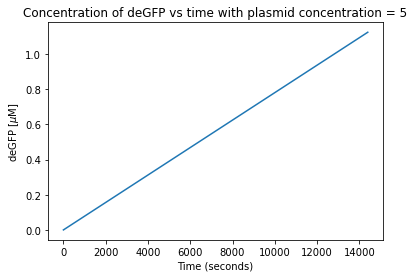

In [12]:
plt.plot(t,deGFPmat_low)
plt.xlabel("Time (seconds)")
plt.ylabel("deGFP [$\mu$M]")
plt.title("Concentration of deGFP vs time with plasmid concentration = 5")


In [13]:
#not entirely sure if this is deGFPmat concentration at high plasmic conc 
# for 5 plasmid conc
deGFPmat_high = []
for i in range(len(t)):
    deGFPmat_high.append((Kcat_p*m_SS[6])*t[i]/(1+KM_R/sol_R0_list[6]))

Text(0.5, 1.0, 'Concentration of deGFP vs time with plasmid concentration = 5')

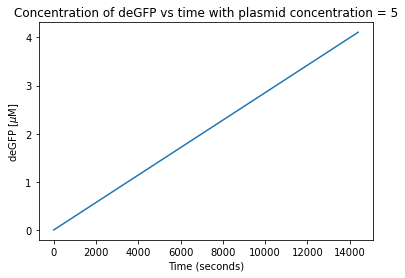

In [14]:
plt.plot(t,deGFPmat_high)
plt.xlabel("Time (seconds)")
plt.ylabel("deGFP [$\mu$M]")
plt.title("Concentration of deGFP vs time with plasmid concentration = 5")


In [15]:
# Maximum rate of mRNA and deGFPdark and deGFPmat
dm,ddeGFPdark,ddeGFPmat = [],[],[]

for i in range(len(P70)):
    dm.append(kcat_m*P70[i]*((sol_E0_list[i]*S70)/KM_70*(k70+sol_E0_list[i])+sol_E0_list[i]*S70)-kd_m*(m_SS[i]/KM_m+m_SS[i]))
    ddeGFPdark.append(Kcat_p*m_SS[i]*sol_R0_list[i]/(KM_R+sol_R0_list[i])-kmat*deGFPdark[i])
    ddeGFPmat.append(kmat*deGFPdark[i])

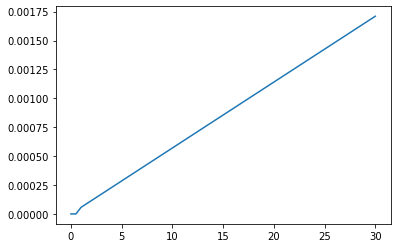

In [18]:
plt.plot(P70,ddeGFPmat)

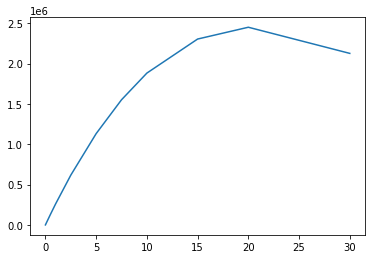

In [20]:
plt.plot(P70,dm)